In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full = pd.read_csv('Zip_Zhvi_AllHomes.csv')
del full['RegionID'], full['SizeRank'], full['Metro'], full['City']

In [3]:
grouped = full.groupby('CountyName').mean().transpose()
grouped = grouped.iloc[1:,:]
grouped.index = pd.to_datetime(grouped.index)

In [4]:
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

# Bay Area Real Estate Boom

Over the past few years, the San Francisco Bay Area has seen a rise in home prices that some have questioned, "Is it worth living in the Bay Area?". The Bay Area has certainly seen an influx in population as a hub for technological innovation but how does it's home value compare to other parts of the nation? What kind of trend are these prices heading towards and what does that mean for prospective home seekers?

In the late 2000s, the United States nationwide saw a steep decline in real estate prices as what's known as the Great Recession and didn't recover until around 2010. The following analysis will look how the housing market has ballooned into what it is now since 2010. 

## Comparing by Bay Area County

If we first look at how houses within the Bay Area are priced (shown below), we notice some patterns emerge. Since the end of the Great Recession, each county has seen their housing prices steadily increase over time. We also notice that some counties are growing faster than others which is causing a disparity to form. Big companies like Facebook, Google, and Twitter are all headquarted within San Mateo, Santa Clara, and San Francisco counties which are counties, along with Marin county, that seem to have grown quicker than the rest of the Bay Area. Whether these are correlated or not will need to be looked into further.

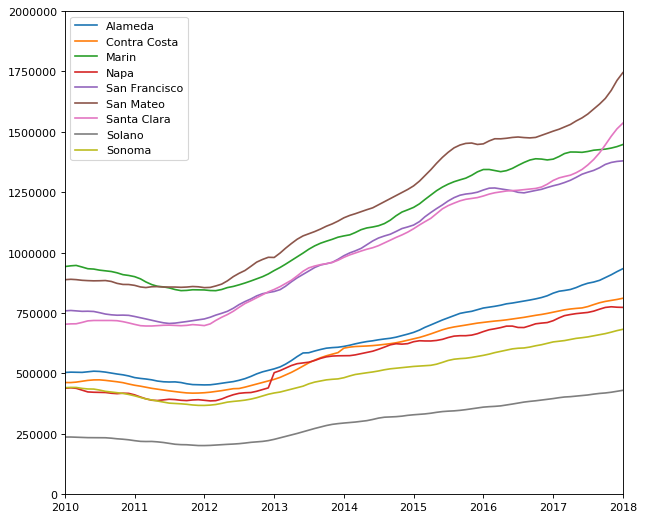

In [10]:
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
i = 1
while i <= len(bayarea_counties):
    plt.plot(grouped[bayarea_counties[i-1]], label = bayarea_counties[i-1])
    i += 1
plt.legend()
plt.axis(['2010','2018',0,2000000])
plt.show()

* Who is your audience?
* What questions are you answering?
* Why should the audience care?
* What are you major insights and surprises?
* What change do you want to affect?

1. Ask the following questions and look for the answers using code and plots:
    * Can you count something interesting?
    * Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    * Can you make a bar plot or a histogram?
    * Can you compare two related quantities?
    * Can you make a scatterplot?
    * Can you make a time-series plot?
2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you'd like to investigate further? What other questions do the insights lead you to ask?
3. Now that you've asked questions, hopefully you've found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [6]:
grouped['bayarea'] = grouped[bayarea_counties].mean(axis=1)